### Jupyter 入门教程

In [1]:
import numpy as np
import os

print('Hello world')

a = 'python'
a

Hello world


'python'

In [2]:
print('Hello world')

Hello world


In [3]:
a = 'python'
a

'python'

# This is a level 1 heading
## This is a level 2 heading
This is some plain text that forms a paragraph.
Add emphasis via **bold** and __bold__, or *italic* and _italic_.
Paragraphs must be separated by an empty line.
* Sometimes we want to include lists.
* Which can be indented.
1. Lists can also be numbered.
2. For ordered lists.
[It is possible to include hyperlinks](https://www.example.com)
Inline code uses single backticks: `foo()`, and code blocks use triple backticks:
```
bar()
```
Or can be indented by 4 spaces:
foo()
And finally, adding images is easy: ![Alt text](https://www.example.com/image.jpg)

In [4]:
import numpy as np
def square(x):
    return x * x

In [5]:
x = np.random.randint(1, 10)
y = square(x)
print('%d squared is %d' % (x, y))

5 squared is 25


## 数据分析例子

接下来通过一个例子来熟悉 Jupyter notebook 的用法

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
df = pd.read_csv('fortune500.csv')

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [6]:
len(df)

25500

In [7]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [8]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [9]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [10]:
len(df.profit[non_numberic_profits])

369

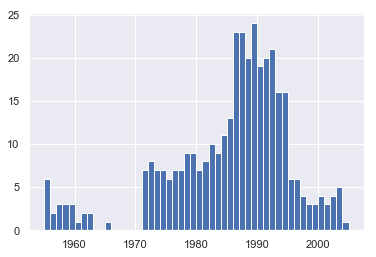

In [11]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

In [12]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [13]:
len(df)

25131

In [14]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

#### 采用 matplotlib 绘制图表

In [16]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

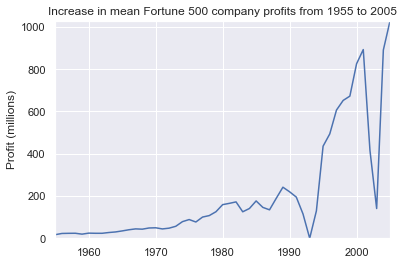

In [18]:
fig, ax = plt.subplots()
plot(x, y, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

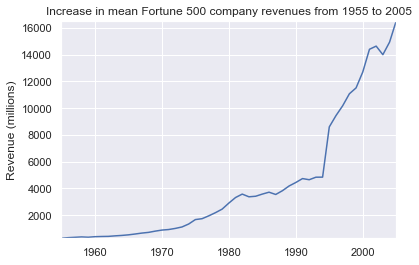

In [19]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')